In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
classes_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Sneaker','Bag','Ankle boot']

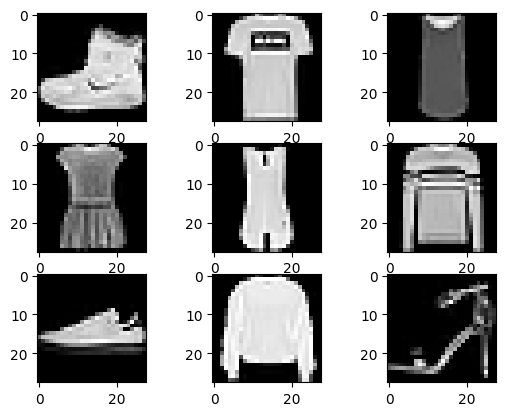

In [ ]:
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

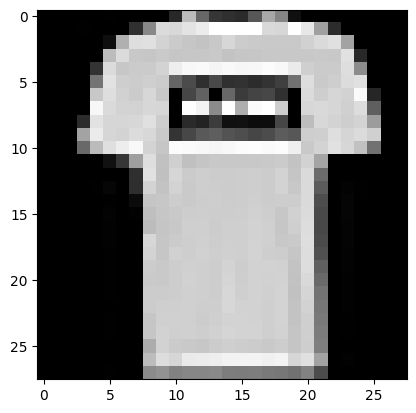

In [ ]:
plt.imshow(train_images[1],cmap='gray')

In [ ]:
train_images[1].shape

(28, 28)

In [ ]:
train_images=train_images/255.0

In [ ]:
test_images=test_images/255.0

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 5s 2ms/step - loss: 0.5038 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3764 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3397 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3136 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2822 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2682 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2595 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2478 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2405 - accurac

In [ ]:
test_loss,test_Acc=model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3725 - accuracy: 0.8721


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
predictions

array([[0.08842367, 0.08842351, 0.08842351, ..., 0.13256893, 0.08842356,
        0.15969922],
       [0.08541673, 0.08540625, 0.23086587, ..., 0.08540625, 0.08540625,
        0.08540625],
       [0.08533681, 0.23196916, 0.08533675, ..., 0.08533675, 0.08533675,
        0.08533675],
       ...,
       [0.08534335, 0.08534048, 0.0853508 , ..., 0.08534048, 0.23191026,
        0.08534048],
       [0.08533703, 0.23196581, 0.08533695, ..., 0.08533695, 0.08533695,
        0.08533695],
       [0.08539277, 0.08539204, 0.08539226, ..., 0.08576426, 0.08539616,
        0.08539329]], dtype=float32)

1/1 [==============================] - 0s 39ms/step
[[0.08842367 0.08842351 0.08842351 0.08842351 0.08842351 0.08876701
  0.0884236  0.13256893 0.08842354 0.15969917]]
ankle_boots


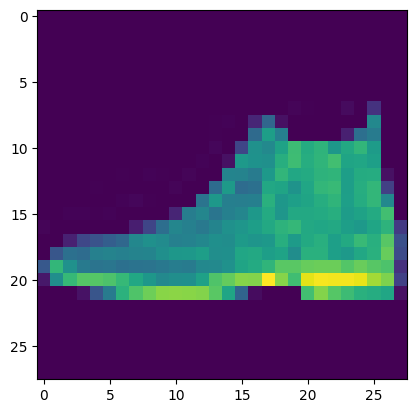

In [ ]:
# There are 10 output labels for the Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
# Make a prediction
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images[:1])
print(predictions)
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(test_images[:1][0])
plt.show()